In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [4]:
data = np.loadtxt('../data/3/30/L')

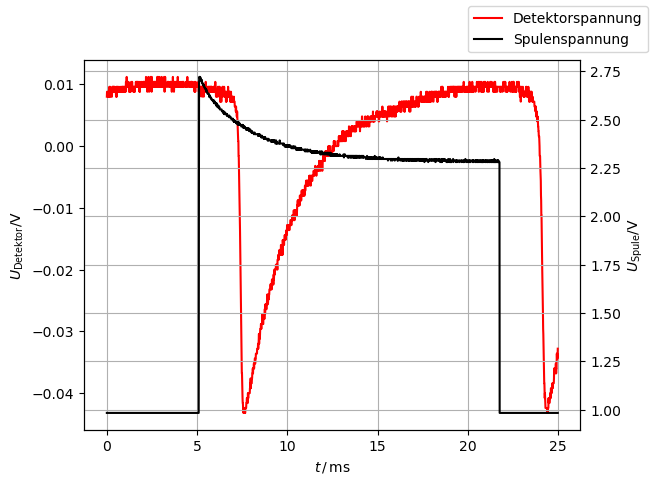

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

transmission = data[:, 2]
time = data[:, 0] * 1e3
magnetic_field = data[:, 1] / 10

ax1.plot(time, transmission, 'r', label='Detektorspannung')
ax1.set(ylabel='$U_\mathrm{Detektor} / \mathrm{V}$', xlabel="$t\,/\, \mathrm{ms}$")
ax2.set(ylabel='$U_\mathrm{Spule} / \mathrm{V}$')
ax2.plot(time, magnetic_field, 'k',label='Spulenspannung')
ax1.grid(axis='x')
ax2.grid()
fig.legend()
fig.savefig('../output/induc_overview.svg')

In [6]:
offset = 512
offset2 = 2176

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

p0 = (0.5, 0.5, 2.25) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, time[offset:offset2], magnetic_field[offset:offset2], p0)
m, t, b = params

print(m)
print(t)
print(b)


2.452799168693196
0.34677461434195844
2.2851358308418566


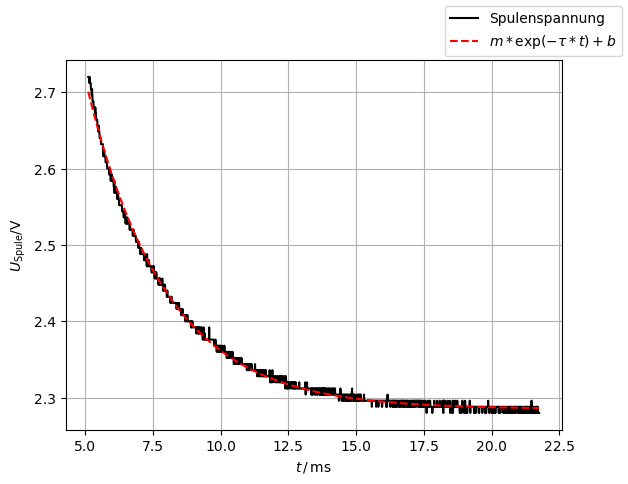

In [24]:
fig2, ax3 = plt.subplots()
ax3.set(xlabel='$t\,/\, \mathrm{ms}$', ylabel='$U_\mathrm{Spule} / \mathrm{V}$')
ax3.plot(time[offset:offset2], magnetic_field[offset:offset2], 'k', label='Spulenspannung')

ax3.plot(time[offset:offset2], monoExp(time[offset:offset2], m, t, b), 'r--', label="$m * \mathrm{exp}(-\\tau*t) + b$")
ax3.grid()
fig2.legend()
fig2.savefig('../output/induc.svg')



In [14]:
H = 1.682 / t

In [19]:
delta_a = (np.sqrt(np.diag(cv)), t)[0][1]
delta_a

0.0009307945878782821

In [20]:
R = 1.682
delta_R = 0.003

delta_H = delta_R /t + delta_a * R / t ** 2

(H, delta_H)

(4.850412718911888, 0.021670380693809374)

$$ L = (4.85 \pm 0.02)\,\mathrm{H}$$